In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
stopwords = set(stopwords.words('english'))
from PIL import Image, ImageOps

In [2]:
airplane_data = pd.read_csv('data/airplanes_final.csv')

In [3]:
airplane_data.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,City,State
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Fort Myer,VA
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,AtlantiCity,NJ
2,1918-12-16,"Elizabeth, New Jersey",US Aerial Mail Service,De Havilland DH-4,1.0,1.0,0.0,NaN,Elizabeth,NJ
3,1919-05-25,"Cleveland, Ohio",US Aerial Mail Service,De Havilland DH-4,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,Cleveland,OH
4,1919-07-19,"Dix Run, Pennsylvania",US Aerial Mail Service,De Havilland DH-4,1.0,1.0,0.0,NaN,Dix Run,PA


In [41]:
airplane_data = airplane_data.dropna(subset=["City"]) # drop NaN values
airplane_data["City"] = airplane_data["City"].str.lower()
airplane_data["City"] = airplane_data["City"].str.replace(r'\s+', '') # remove whitespace
#get value counts of each city
city_counts = airplane_data["City"].value_counts()
top_cities = city_counts.head(30)
cities = top_cities.index.str.cat(sep=' ')

/var/folders/bb/kwh2dgld3rg_qtcjl3czmxy80000gn/T/ipykernel_97838/4221527361.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  airplane_data["City"] = airplane_data["City"].str.replace(r'\s+', '') # remove whitespace


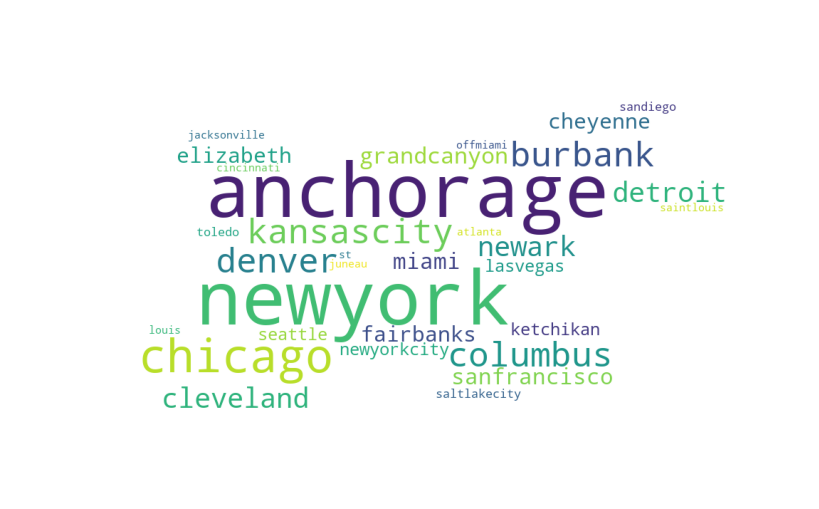

In [49]:
mask = np.array(Image.open('data/airplane.jpeg'))
# Generate the word cloud
wordcloud = WordCloud(background_color="white", mask=mask,
               max_words=100, max_font_size=256, width=mask.shape[1],
               height=mask.shape[0], colormap="viridis").generate(cities)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

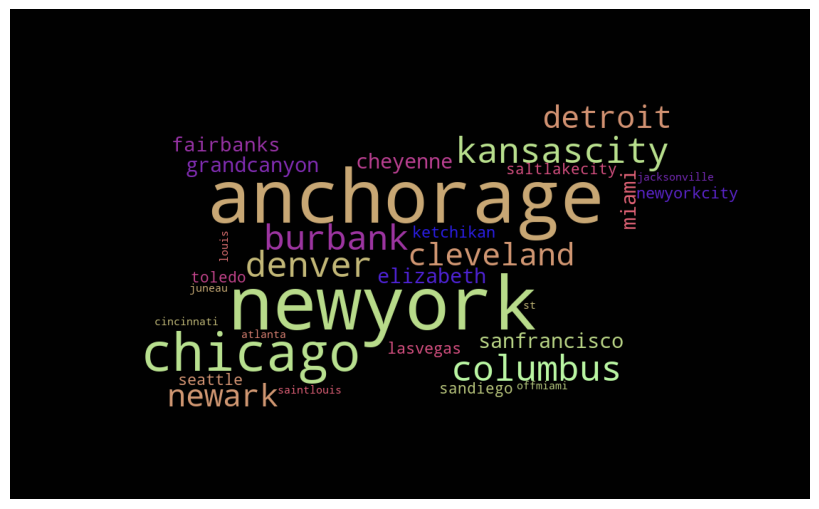

In [43]:
mask = np.array(Image.open('data/airplane.jpeg'))
wordcloud = WordCloud(background_color="white", mask=mask,
               max_words=100, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]).generate(cities)

border_size = 5
image = Image.fromarray((wordcloud.to_array() * 255).astype(np.uint8))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(image)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()